In [51]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
df = pd.read_csv(r'C:/Users/Admin/Downloads/МН/tsunami_dataset.csv')
df.head()

ID  YEAR  MONTH   DAY  HOUR  MINUTE  LATITUDE  LONGITUDE  \
0   12  -330    NaN   NaN   NaN     NaN     40.00     25.000   
1  481  1764    2.0  11.0   NaN     NaN     51.45     -2.583   
2   71   859    NaN   NaN   NaN     NaN     36.08     36.250   
3  186  1580    1.0   NaN   NaN     NaN     40.00    128.000   
4    5 -1300    NaN   NaN   NaN     NaN     39.96     26.240   

                         LOCATION_NAME      COUNTRY  ...       CAUSE  \
0  E. SPORADES ISLANDS, AEGEAN ISLANDS       GREECE  ...  Earthquake   
1                     BRISTOL, ENGLAND           UK  ...     Unknown   
2                            SAMANDAGI       TURKEY  ...  Earthquake   
3                           YELLOW SEA  NORTH KOREA  ...     Unknown   
4                 IONIAN COASTS, TROAD       TURKEY  ...     Unknown   

          EVENT_VALIDITY EQ_MAGNITUDE  EQ_DEPTH  TS_INTENSITY  \
0  Very Doubtful Tsunami          7.0       NaN           NaN   
1  Very Doubtful Tsunami          NaN       NaN           NaN   
2   Questionable Tsunami          NaN       NaN           3.0   
3  Very Doubtful Tsunami          NaN       NaN           1.0   
4   Questionable Tsunami          6.0       NaN           5.0   

   DAMAGE_TOTAL_DESCRIPTION HOUSES_TOTAL_DESCRIPTION DEATHS_TOTAL_DESCRIPTION  \
0                       NaN                      NaN                      NaN   
1                       NaN                      NaN                      NaN   
2                       NaN                      NaN                      NaN   
3                       NaN                      NaN                      NaN   
4                       NaN                      NaN                      NaN   

                                                 URL  \
0  https://www.ngdc.noaa.gov/hazel/view/hazards/t...   
1  https://www.ngdc.noaa.gov/hazel/view/hazards/t...   
2  https://www.ngdc.noaa.gov/hazel/view/hazards/t...   
3  https://www.ngdc.noaa.gov/hazel/view/hazards/t...   
4  https://www.ngdc.noaa.gov/hazel/view/hazards/t...   

                                            COMMENTS  
0  330 B.C. Aegean Sea, Sporades Islands, 40 N 25...  
1  Reference #1894, in full: "On Saturday the 11t...  
2  859 (possibly 861), November. Levantian Sea, N...  
3  <P><blockquote><i>Reference #414:</i></blockqu...  
4  1300 B.C. Ionian and Aegean Seas. References t...  

[5 rows x 21 columns]

<Figure size 1500x1000 with 0 Axes>

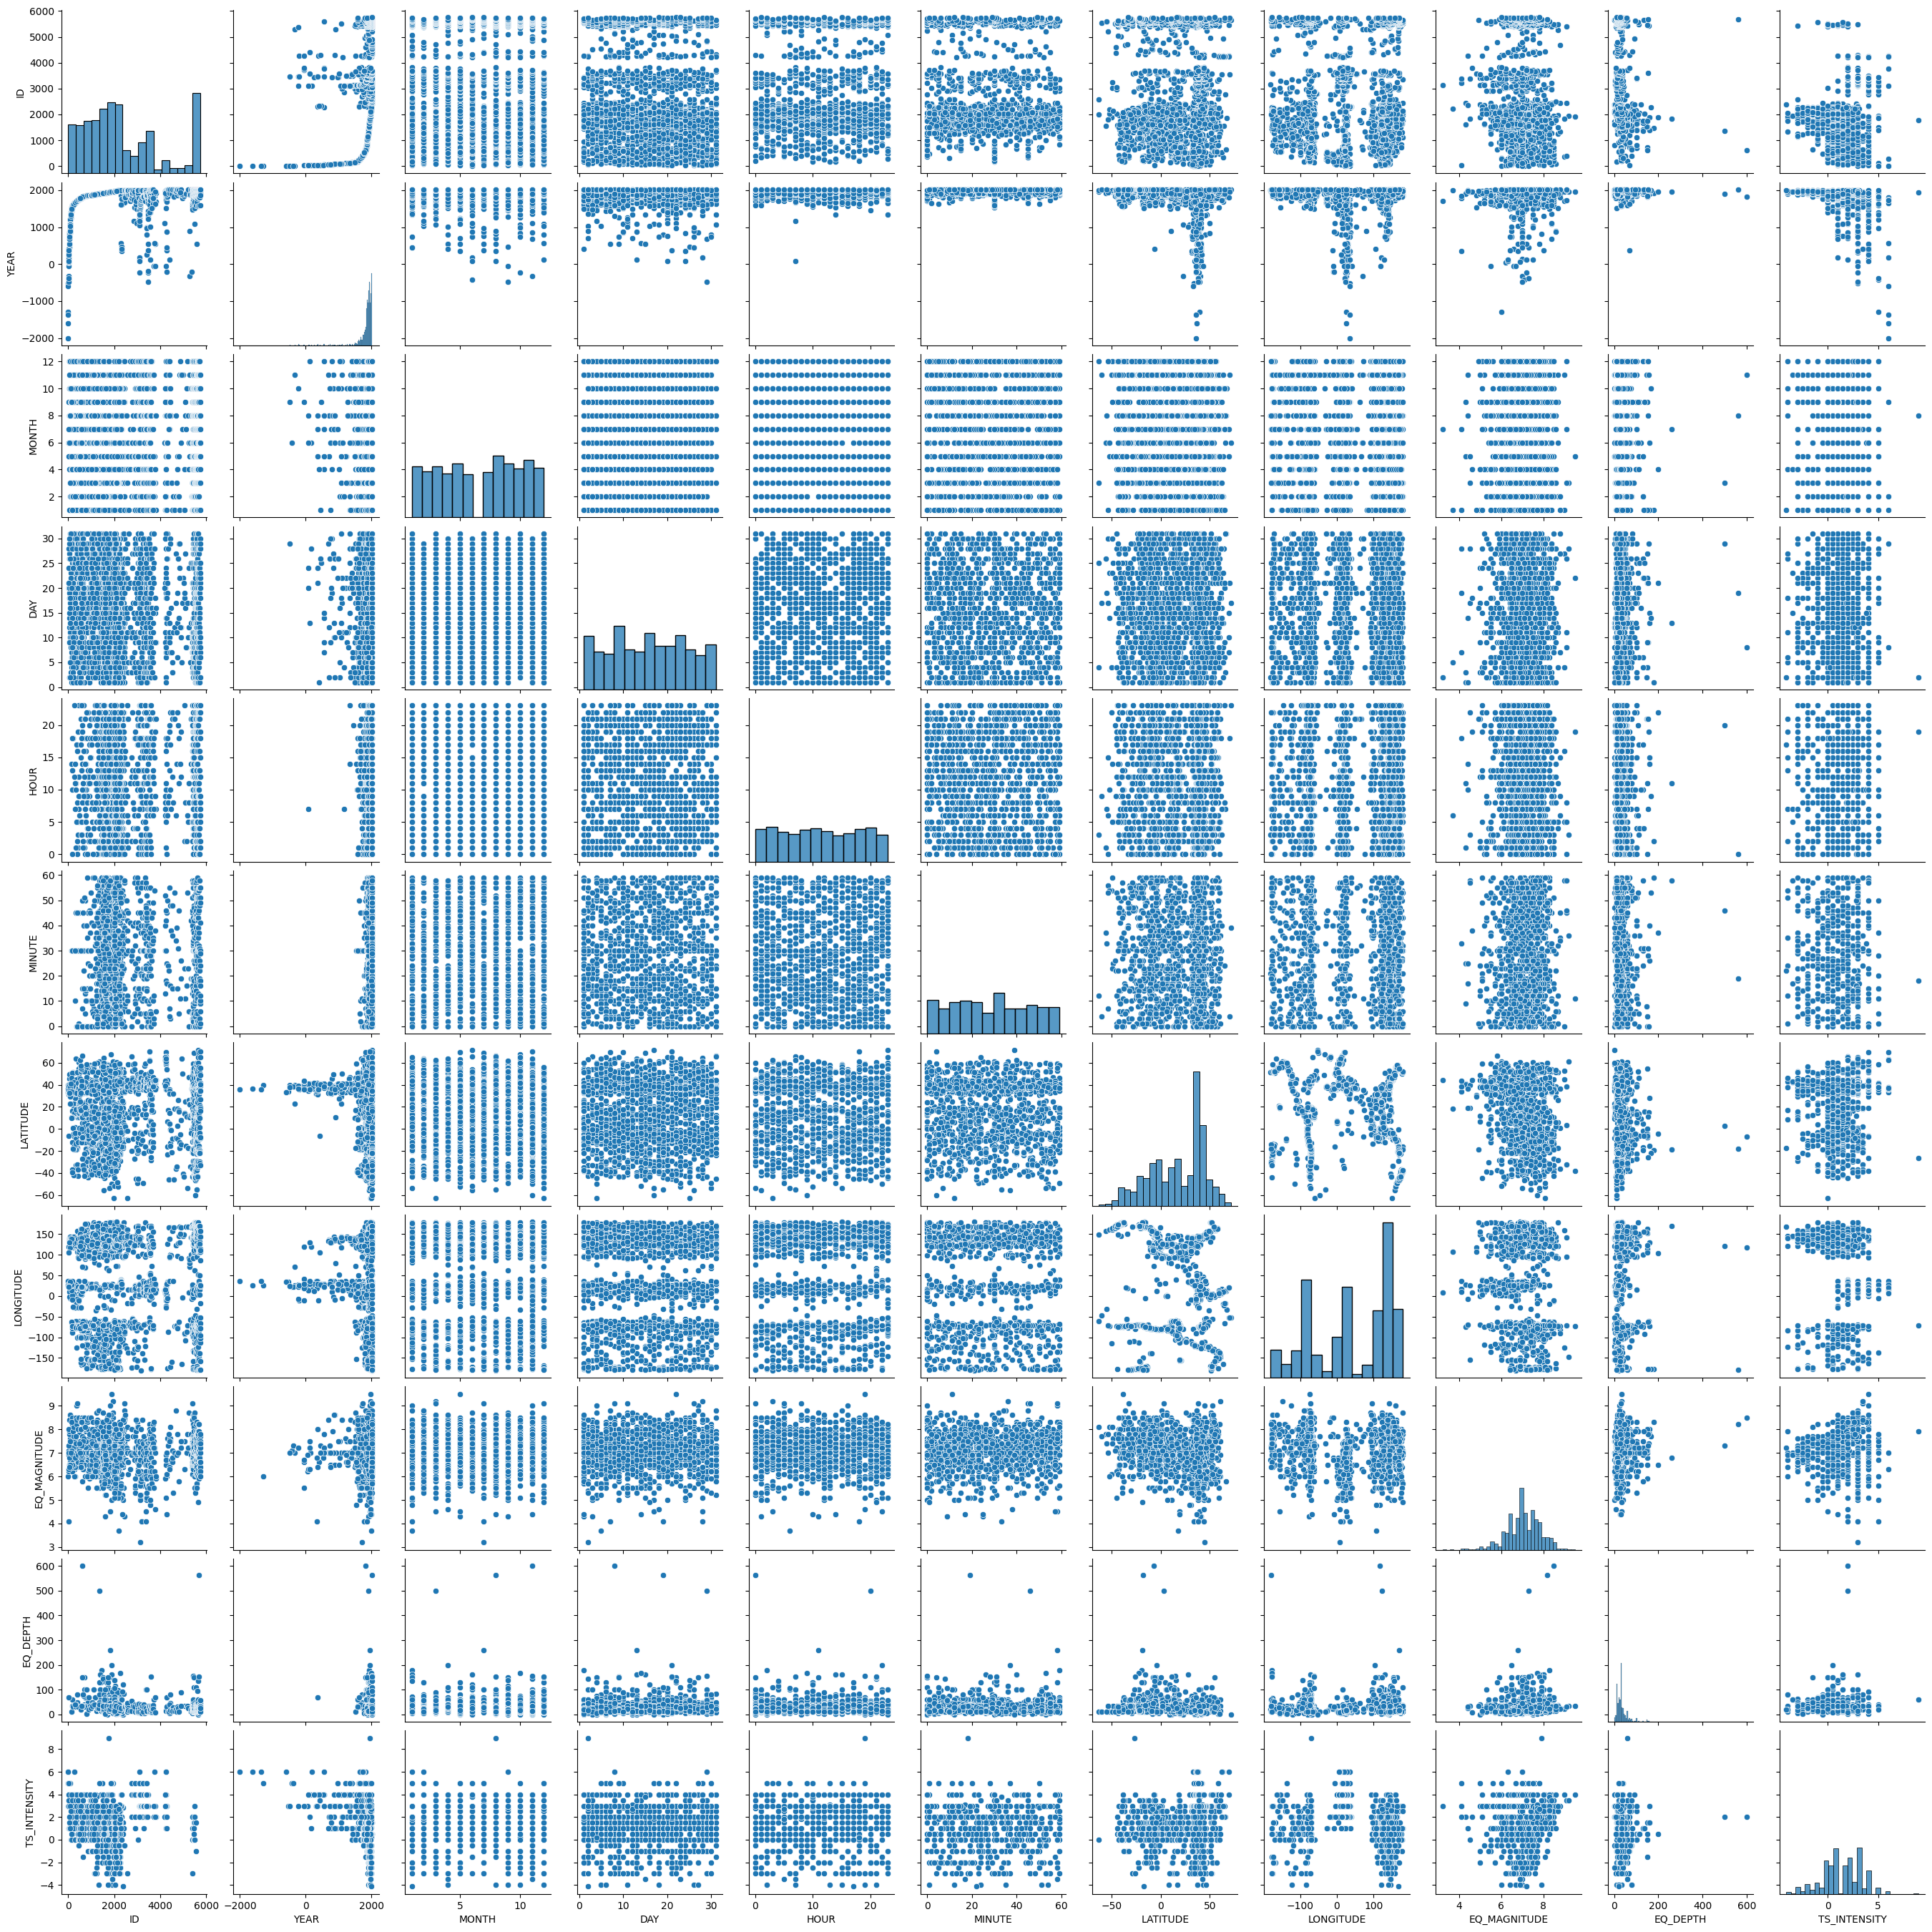

In [63]:
plt.figure(figsize=(15,10))
sns.pairplot(data=df)
plt.show()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   YEAR                      2259 non-null   int64  
 1   MONTH                     2259 non-null   object 
 2   DAY                       2259 non-null   object 
 3   HOUR                      2259 non-null   object 
 4   MINUTE                    2259 non-null   object 
 5   LATITUDE                  2259 non-null   float64
 6   LONGITUDE                 2259 non-null   float64
 7   REGION                    2259 non-null   object 
 8   CAUSE                     2259 non-null   object 
 9   EVENT_VALIDITY            2259 non-null   object 
 10  EQ_MAGNITUDE              1474 non-null   float64
 11  EQ_DEPTH                  907 non-null    float64
 12  TS_INTENSITY              1101 non-null   float64
 13  DAMAGE_TOTAL_DESCRIPTION  2259 non-null   object 
 14  HOUSES_T

In [70]:
df.isnull().sum()

ID                             0
YEAR                           0
MONTH                        104
DAY                          177
HOUR                         951
MINUTE                      1024
LATITUDE                       0
LONGITUDE                      0
LOCATION_NAME                  9
COUNTRY                        0
REGION                         1
CAUSE                          1
EVENT_VALIDITY                 0
EQ_MAGNITUDE                 785
EQ_DEPTH                    1352
TS_INTENSITY                1158
DAMAGE_TOTAL_DESCRIPTION    1204
HOUSES_TOTAL_DESCRIPTION    1653
DEATHS_TOTAL_DESCRIPTION    1585
URL                            0
COMMENTS                     164
dtype: int64

In [69]:
df["REGION"].unique()

array(['Mediterranean Sea', 'Northeast Atlantic Ocean',
       'China, North and South Korea, Philippines, Taiwan', 'Japan',
       'Caribbean Sea', 'West Coast of South America',
       'Indian Ocean (including west coast of Australia)',
       'Indonesia (Pacific Ocean) and Malaysia',
       'West Coast of North and Central America',
       'New Caledonia, New Guinea, Solomon Is., Vanuatu',
       'East Coast USA and Canada, St Pierre and Miquelon',
       'Kamchatka and Kuril Islands', 'Red Sea and Persian Gulf',
       'E Coast Australia, New Zealand, South Pacific Is.',
       'Alaska (including Aleutian Islands)', 'West Coast of Africa',
       'Hawaii, Johnston Atoll, Midway I', 'Northwest Atlantic Ocean',
       'Southwest Atlantic Ocean', 'Black Sea and Caspian Sea',
       'Central Africa', 'Southeast Atlantic Ocean', nan], dtype=object)

In [68]:

print(df[df['REGION'].isnull()])

        ID  YEAR MONTH  DAY HOUR MINUTE  LATITUDE  LONGITUDE LOCATION_NAME  \
2242  5737  1909  10.0  6.0  2.0   41.0      41.8     -112.7          UTAH   

     COUNTRY REGION       CAUSE  \
2242     USA    NaN  Earthquake   

                                         EVENT_VALIDITY EQ_MAGNITUDE EQ_DEPTH  \
2242  Event that only caused a seiche or disturbance...      missing  missing   

     TS_INTENSITY DAMAGE_TOTAL_DESCRIPTION HOUSES_TOTAL_DESCRIPTION  \
2242      missing    Limited (<$1 million)                  missing   

     DEATHS_TOTAL_DESCRIPTION  \
2242                  missing   

                                                    URL  \
2242  https://www.ngdc.noaa.gov/hazel/view/hazards/t...   

                                               COMMENTS  
2242  Waves reportedly rolled over a bathhouse pier ...  


In [46]:
from sklearn.preprocessing import LabelEncoder

# Створення копії DataFrame
newdf = df.copy()

# Ініціалізація LabelEncoder
label_encoder = LabelEncoder()

# Застосування LabelEncoding до кожної з фіч
categorical_features = ['DAMAGE_TOTAL_DESCRIPTION', 'HOUSES_TOTAL_DESCRIPTION', 'DEATHS_TOTAL_DESCRIPTION']
for feature in categorical_features:
    newdf[feature] = label_encoder.fit_transform(newdf[feature])

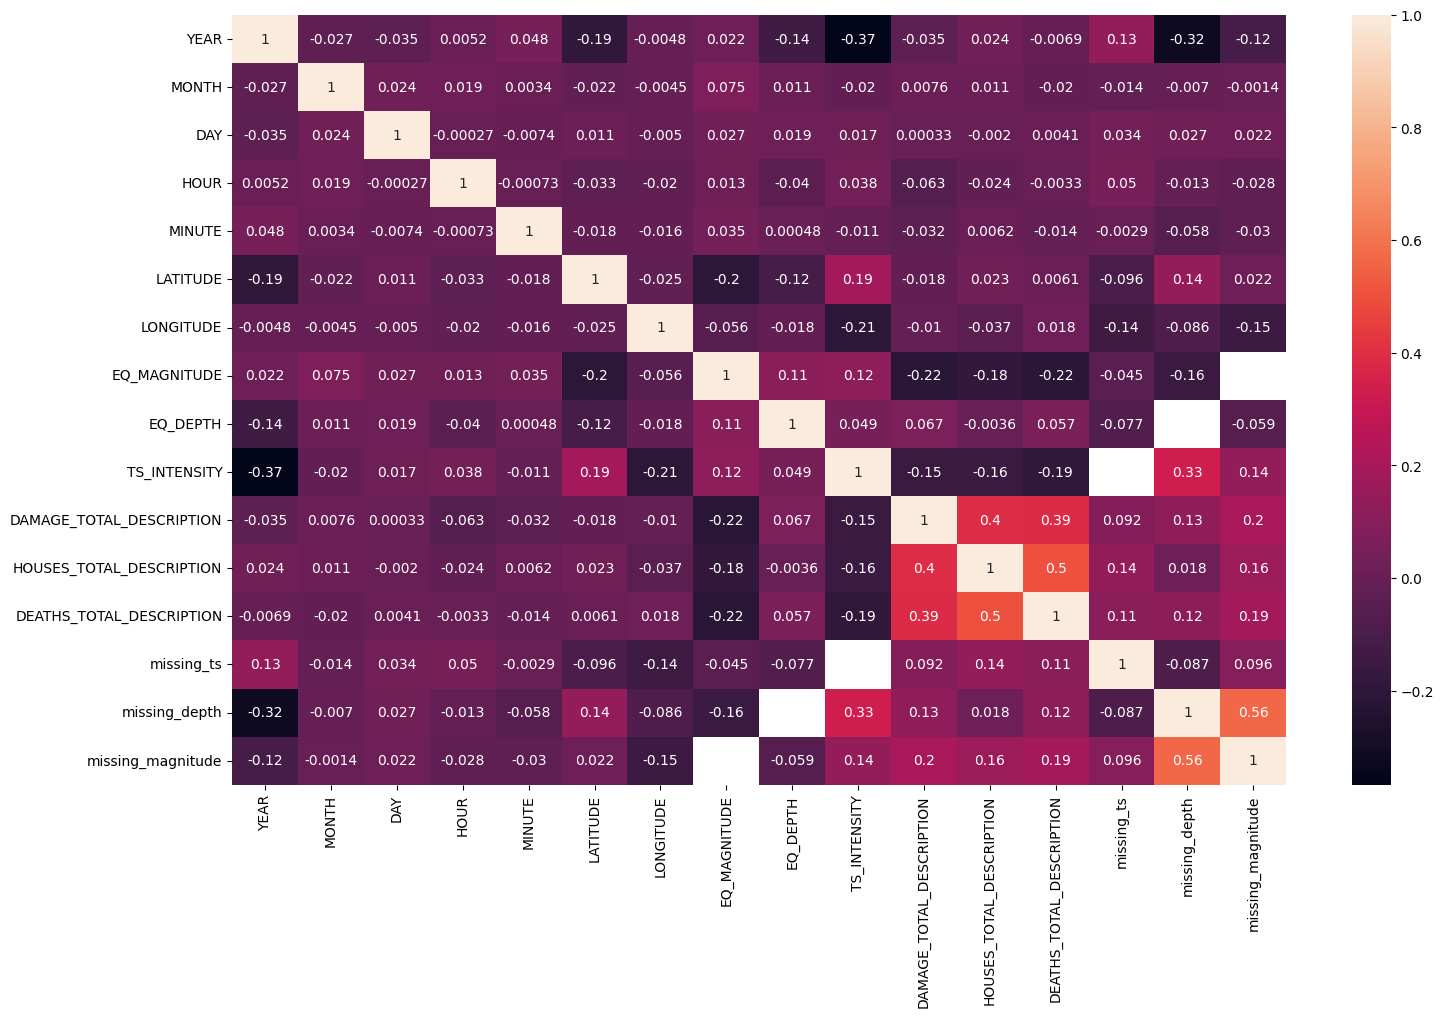

In [47]:
numerical = newdf.select_dtypes(include=['int', 'float'])
corr = numerical.corr()


plt.figure(figsize=(17, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [85]:
from scipy.stats import chi2_contingency
categ=df
significant_pairs=[]
# Перебір усіх пар категоріальних ознак
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            data = pd.crosstab(df[col1], df[col2])
            chi2, p, _, _ = chi2_contingency(data)
            if p < 0.05:
                significant_pairs.append((col1, col2, p))

for pair in significant_pairs:
    print(f"Chi-square test between {pair[0]} and {pair[1]}: p-value = {pair[2]}")


Chi-square test between YEAR and MONTH: p-value = 9.249192650259484e-05
Chi-square test between YEAR and DAY: p-value = 0.00010759433909251791
Chi-square test between YEAR and LOCATION_NAME: p-value = 0.0
Chi-square test between YEAR and COUNTRY: p-value = 7.37293172464105e-113
Chi-square test between YEAR and EVENT_VALIDITY: p-value = 7.96755193974627e-18
Chi-square test between YEAR and DAMAGE_TOTAL_DESCRIPTION: p-value = 0.047186157138544585
Chi-square test between YEAR and DEATHS_TOTAL_DESCRIPTION: p-value = 0.03732429444930527
Chi-square test between YEAR and COMMENTS: p-value = 5.529906068595881e-05
Chi-square test between MONTH and YEAR: p-value = 9.249192650259484e-05
Chi-square test between MONTH and LATITUDE: p-value = 0.007424835959900023
Chi-square test between MONTH and LONGITUDE: p-value = 0.0357168040918198
Chi-square test between MONTH and LOCATION_NAME: p-value = 0.001914581939437527
Chi-square test between DAY and YEAR: p-value = 0.00010759433909251791
Chi-square test

In [4]:
df['DEATHS_TOTAL_DESCRIPTION'] = df['DEATHS_TOTAL_DESCRIPTION'].fillna('missing')
df['HOUSES_TOTAL_DESCRIPTION'] = df['HOUSES_TOTAL_DESCRIPTION'].fillna('missing')
df['DAMAGE_TOTAL_DESCRIPTION'] = df['DAMAGE_TOTAL_DESCRIPTION'].fillna('missing')
df['missing_ts'] = np.where(df['TS_INTENSITY'].isnull(), 1, 0)
df['missing_depth'] = np.where(df['EQ_DEPTH'].isnull(), 1, 0)
df['missing_magnitude'] = np.where(df['EQ_MAGNITUDE'].isnull(), 1, 0)

df['REGION'] = df['REGION'].fillna('West Coast of North and Central America')
df['CAUSE'] = df['CAUSE'].fillna(df['CAUSE'].mode()[0])

In [98]:
df['DEATHS_TOTAL_DESCRIPTION'] = df['DEATHS_TOTAL_DESCRIPTION'].fillna(df['DEATHS_TOTAL_DESCRIPTION'].mode()[0])
df['HOUSES_TOTAL_DESCRIPTION'] = df['HOUSES_TOTAL_DESCRIPTION'].fillna(df['HOUSES_TOTAL_DESCRIPTION'].mode()[0])
df['DAMAGE_TOTAL_DESCRIPTION'] = df['DAMAGE_TOTAL_DESCRIPTION'].fillna(df['DAMAGE_TOTAL_DESCRIPTION'].mode()[0])
df['missing_ts'] = np.where(df['TS_INTENSITY'].isnull(), 1, 0)
df['missing_depth'] = np.where(df['EQ_DEPTH'].isnull(), 1, 0)
df['missing_magnitude'] = np.where(df['EQ_MAGNITUDE'].isnull(), 1, 0)

df['REGION'] = df['REGION'].fillna('West Coast of North and Central America')
df['CAUSE'] = df['CAUSE'].fillna(df['CAUSE'].mode()[0])

In [99]:
df=df.drop(columns=["ID","URL","COMMENTS","LOCATION_NAME"],axis=1)

In [32]:
print(df.describe())


              YEAR     LATITUDE    LONGITUDE  EQ_MAGNITUDE    EQ_DEPTH  \
count  2259.000000  2259.000000  2259.000000   1474.000000  907.000000   
mean   1819.188136    17.002135    40.346320      7.046676   36.298787   
std     354.081686    27.730844   104.605369      0.796125   41.098547   
min   -2000.000000   -63.000000  -179.971000      3.200000    0.000000   
25%    1835.500000    -5.000000   -70.200000      6.600000   17.000000   
50%    1909.000000    23.000000    34.400000      7.000000   31.000000   
75%    1968.000000    38.670000   137.832500      7.600000   40.000000   
max    2020.000000    71.813000   179.984000      9.500000  600.000000   

       TS_INTENSITY   missing_ts  missing_depth  missing_magnitude  
count   1101.000000  2259.000000    2259.000000        2259.000000  
mean       1.376985     0.512616       0.598495           0.347499  
std        1.840800     0.499951       0.490311           0.476281  
min       -4.140000     0.000000       0.000000          

In [212]:
df.nunique()

YEAR                         513
MONTH                         13
DAY                           32
HOUR                          25
MINUTE                        61
LATITUDE                    1334
LONGITUDE                   1579
COUNTRY                      103
REGION                        22
CAUSE                         10
EVENT_VALIDITY                 5
EQ_MAGNITUDE                  52
EQ_DEPTH                     103
TS_INTENSITY                  32
DAMAGE_TOTAL_DESCRIPTION       5
HOUSES_TOTAL_DESCRIPTION       5
DEATHS_TOTAL_DESCRIPTION       5
missing_ts                     2
missing_depth                  2
missing_magnitude              2
dtype: int64

In [18]:
duplicates = df.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

Кількість дублікатів: 0


In [33]:
plt.figure(figsize=(12, 24))
sns.countplot(y="COUNTRY", data=df, order=df["COUNTRY"].value_counts().index)
plt.title("Country and Tsunamis ", fontsize=18)
plt.xlabel("Number of Tsunamis ", fontsize=16)
plt.ylabel("Country", fontsize=16)
plt.show()

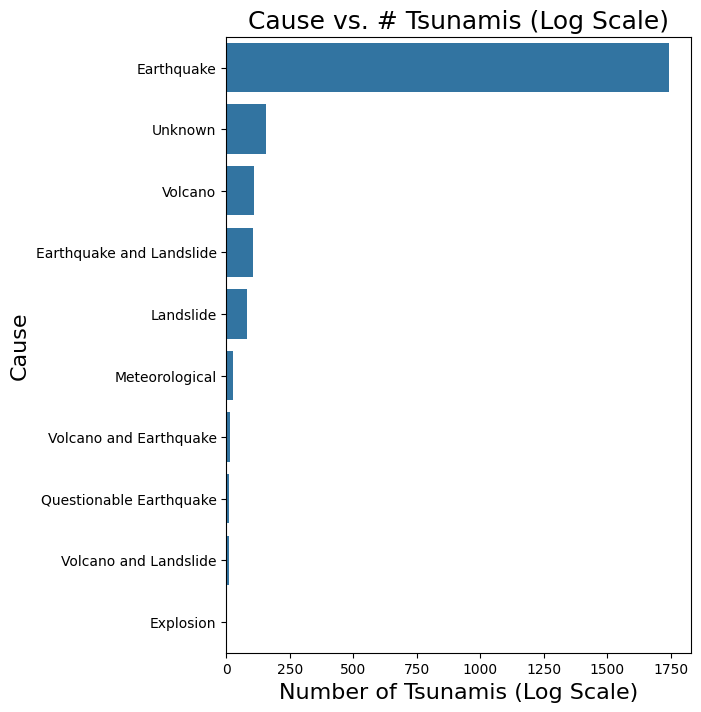

In [34]:
plt.figure(figsize=(6,8))
sns.countplot(y="CAUSE", data=df, order=df["CAUSE"].value_counts().index)

plt.title("Cause vs. # Tsunamis ",fontsize=18)
plt.xlabel("Number of Tsunamis ",fontsize=16)
plt.ylabel("Cause",fontsize=16)

plt.show()

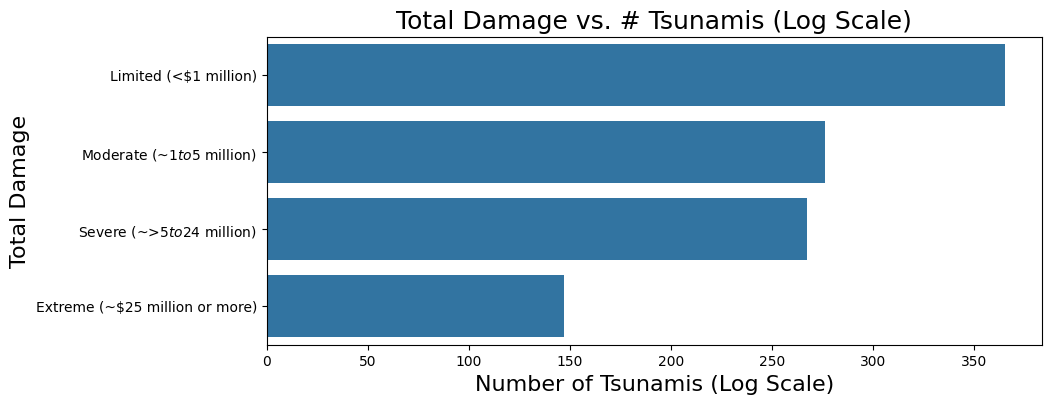

In [35]:
plt.figure(figsize=(10,4))
sns.countplot(y="DAMAGE_TOTAL_DESCRIPTION", data=df, order=df["DAMAGE_TOTAL_DESCRIPTION"].value_counts().index)
plt.title("Total Damage vs. # Tsunamis ",fontsize=18)
plt.xlabel("Number of Tsunamis ",fontsize=16)
plt.ylabel("Total Damage",fontsize=16)

plt.show()

In [100]:
from sklearn.model_selection import train_test_split
X=df

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [101]:
from sklearn_pandas import gen_features
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

numeric_features = ['YEAR', 'LATITUDE', 'LONGITUDE',"EQ_MAGNITUDE","EQ_DEPTH","TS_INTENSITY","MINUTE","DAY","HOUR","MONTH"]
bin_features = ['missing_ts','missing_depth','missing_magnitude']
categ = ['REGION', 'CAUSE', 'EVENT_VALIDITY', 'HOUSES_TOTAL_DESCRIPTION', 'DEATHS_TOTAL_DESCRIPTION',"COUNTRY"]

# Генерація функцій для мапера
numeric_transformations = gen_features(
    columns=[[col] for col in numeric_features],
    classes=[
        {'class': SimpleImputer, 'strategy': 'most_frequent'},
        {'class': MinMaxScaler}
    ]
)

categorical_transformations = gen_features(
    columns=[[col] for col in categ],
    classes=[OneHotEncoder]
)
categorical_f = gen_features(
    columns=[[col] for col in bin_features]
)


In [102]:
from sklearn_pandas import DataFrameMapper
preprocessor = DataFrameMapper(
    numeric_transformations + categorical_transformations+categorical_f,
    df_out=True, default=False
)



In [103]:

preprocessor.fit(X)
X_train = preprocessor.transform(X)
X_test = preprocessor.transform(X_test)


In [104]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


pca0 = PCA()
X_pca0 = pca0.fit_transform(X_train)

explained_variance = pca0.explained_variance_ratio_


# Графік explained variance для кожної компоненти
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.tight_layout()
plt.show()


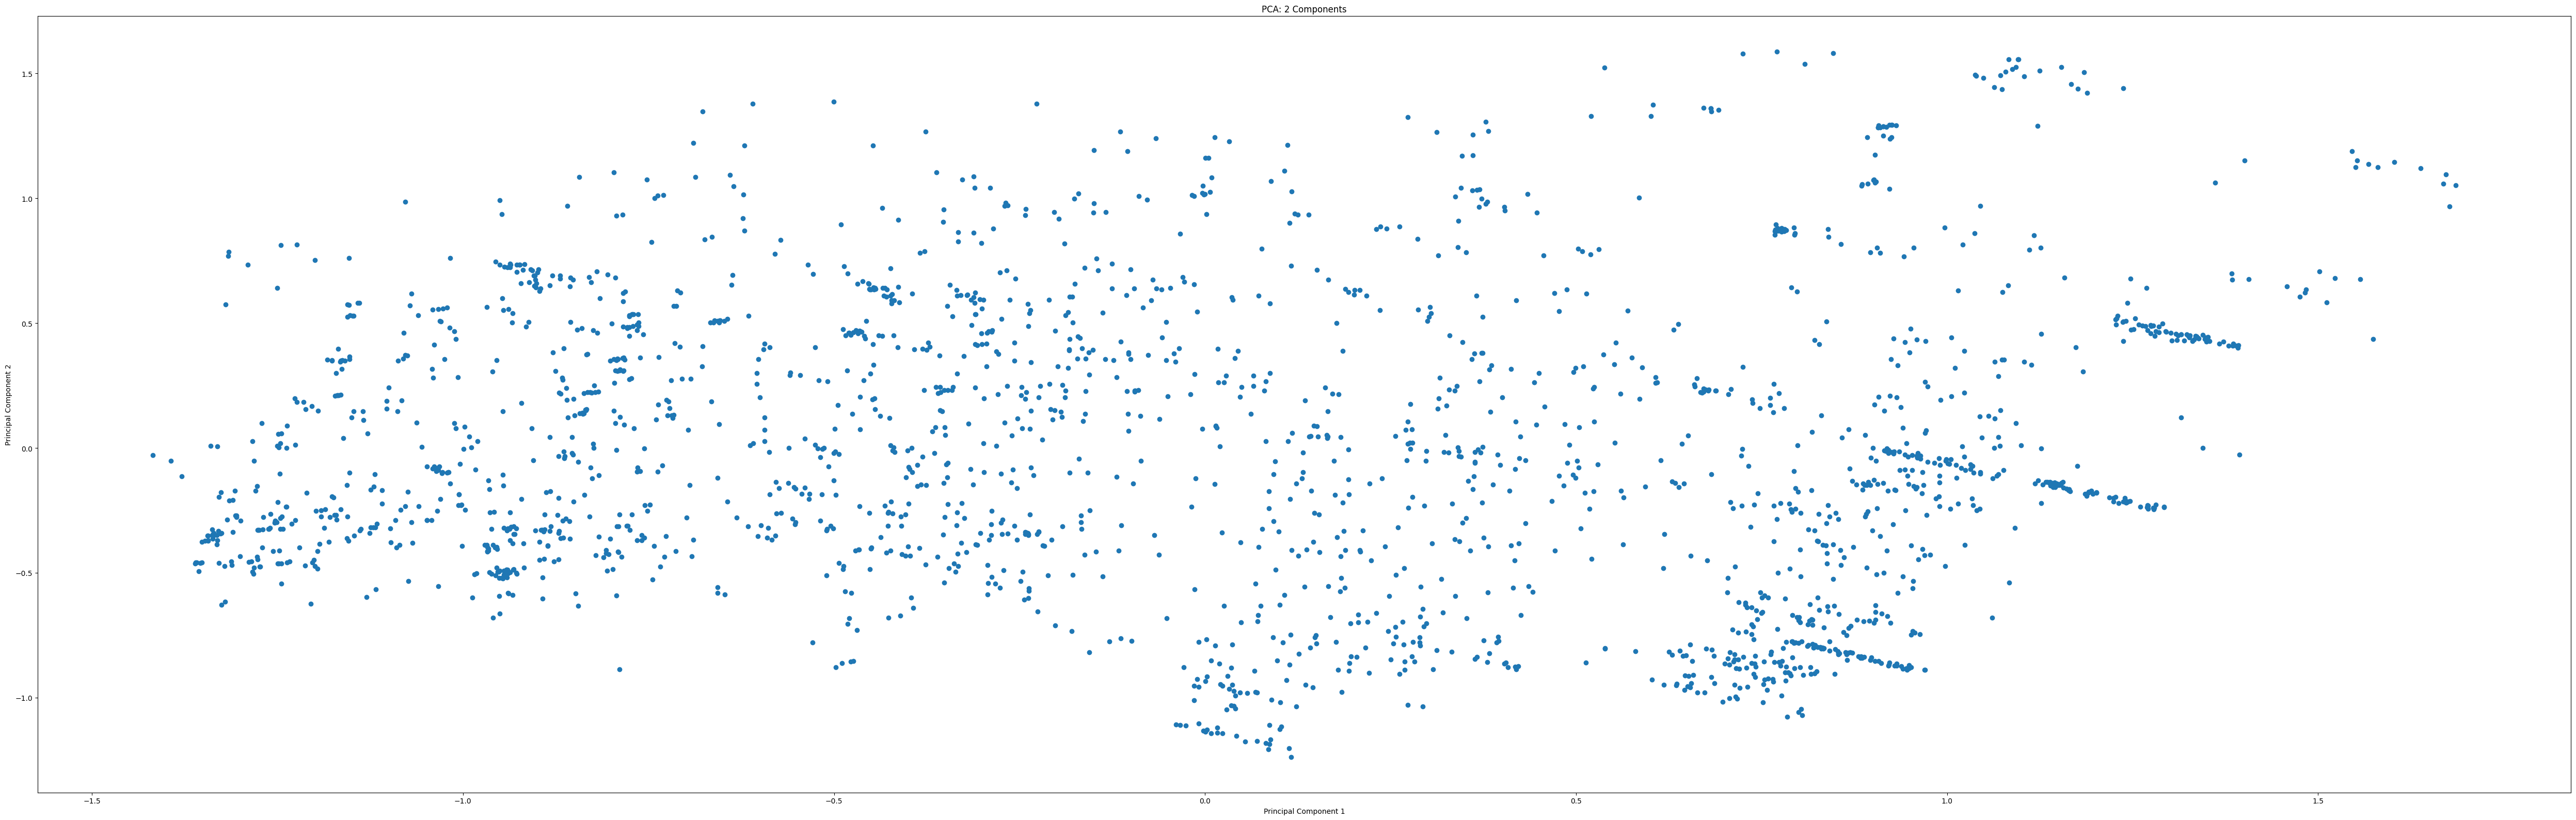

In [105]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Зменшення вимірності до двох компонент
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_train)

# Візуалізація об'єктів у новому просторі
plt.figure(figsize=(50, 16))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2 Components')
plt.tight_layout()
plt.show()

In [79]:
pca.components_

array([[ 2.20240064e-02,  9.09241090e-03,  1.12548956e-01,
         2.15142720e-02, -3.08008566e-03, -2.15079240e-02,
         8.67434446e-03, -1.55770883e-02,  9.03995201e-04,
         8.04251791e-03,  2.54939585e-03,  1.07988103e-03,
        -2.62874471e-02, -7.31158423e-04, -7.22503224e-03,
        -2.77764110e-02, -2.86587380e-02, -8.42609205e-05,
        -4.35861234e-03, -7.26389205e-03,  2.05354319e-01,
         3.54849950e-02, -1.04945955e-01,  4.35491077e-02,
        -4.26430579e-02, -3.97297319e-03, -1.11244005e-04,
        -6.26008623e-04, -1.74578846e-03, -4.15944903e-03,
        -1.19031868e-02, -1.55244832e-02,  2.49294823e-01,
         1.27597203e-02, -2.39985862e-04, -4.17926305e-02,
        -1.75707954e-02, -8.94647508e-03, -1.31768642e-01,
        -5.33575360e-02, -6.14186229e-03, -2.23661592e-03,
         4.85373981e-01, -2.96300865e-02, -6.53652301e-02,
        -1.85601745e-01, -2.04776920e-01,  1.88607611e-02,
        -1.05728321e-01,  1.75741966e-02,  6.92933631e-0

In [18]:
print(X_train.columns)

Index(['YEAR', 'LATITUDE', 'LONGITUDE', 'EQ_MAGNITUDE', 'EQ_DEPTH',
       'TS_INTENSITY', 'MINUTE', 'DAY', 'HOUR', 'MONTH', 'REGION_0',
       'REGION_1', 'REGION_2', 'REGION_3', 'REGION_4', 'REGION_5', 'REGION_6',
       'REGION_7', 'REGION_8', 'REGION_9', 'REGION_10', 'REGION_11',
       'REGION_12', 'REGION_13', 'REGION_14', 'REGION_15', 'REGION_16',
       'REGION_17', 'REGION_18', 'REGION_19', 'REGION_20', 'REGION_21',
       'CAUSE_0', 'CAUSE_1', 'CAUSE_2', 'CAUSE_3', 'CAUSE_4', 'CAUSE_5',
       'CAUSE_6', 'CAUSE_7', 'CAUSE_8', 'CAUSE_9', 'EVENT_VALIDITY_0',
       'EVENT_VALIDITY_1', 'EVENT_VALIDITY_2', 'EVENT_VALIDITY_3',
       'EVENT_VALIDITY_4', 'HOUSES_TOTAL_DESCRIPTION_0',
       'HOUSES_TOTAL_DESCRIPTION_1', 'HOUSES_TOTAL_DESCRIPTION_2',
       'HOUSES_TOTAL_DESCRIPTION_3', 'HOUSES_TOTAL_DESCRIPTION_4',
       'DEATHS_TOTAL_DESCRIPTION_0', 'DEATHS_TOTAL_DESCRIPTION_1',
       'DEATHS_TOTAL_DESCRIPTION_2', 'DEATHS_TOTAL_DESCRIPTION_3',
       'DEATHS_TOTAL_DESCRIPTION_4'

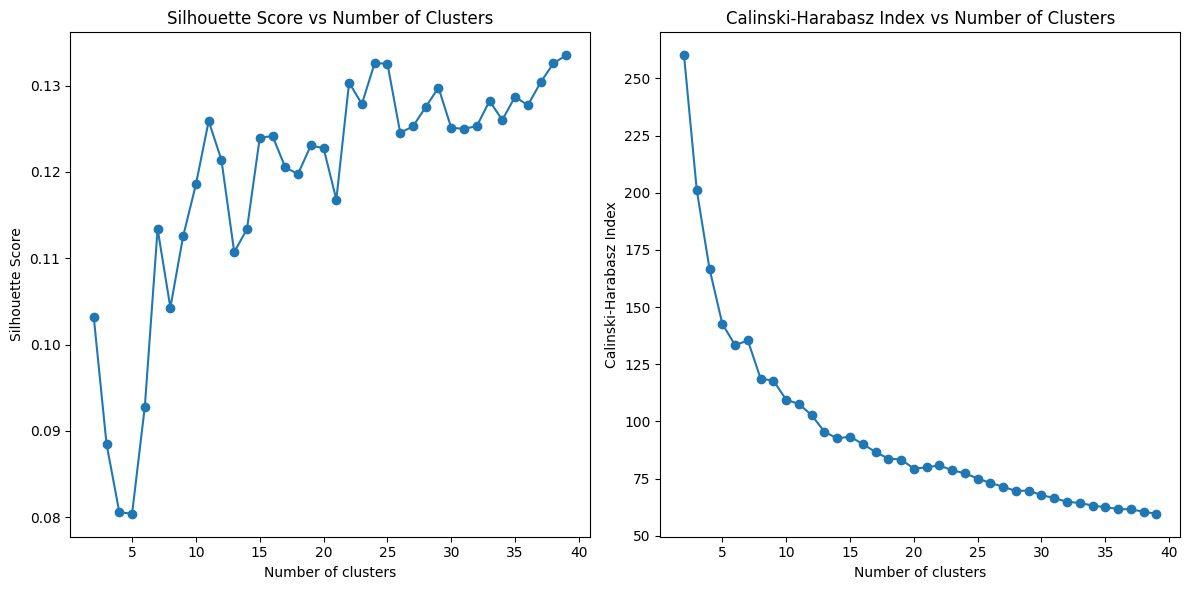

In [112]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Навчання моделі з різною кількістю кластерів та оцінка якості
clusters_range = range(2, 40)  # Діапазон кількостей кластерів
silhouette_scores = []
calinski_harabasz_scores = []

for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X_train)
    labels = kmeans.labels_
    silhouette_score_val = silhouette_score(X_train, labels)
    calinski_harabasz_score_val = calinski_harabasz_score(X_train, labels)
    silhouette_scores.append(silhouette_score_val)
    calinski_harabasz_scores.append(calinski_harabasz_score_val)

# Візуалізація результатів оцінки якості кластеризації
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')

plt.subplot(1, 2, 2)
plt.plot(clusters_range, calinski_harabasz_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index vs Number of Clusters')
plt.tight_layout()
plt.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



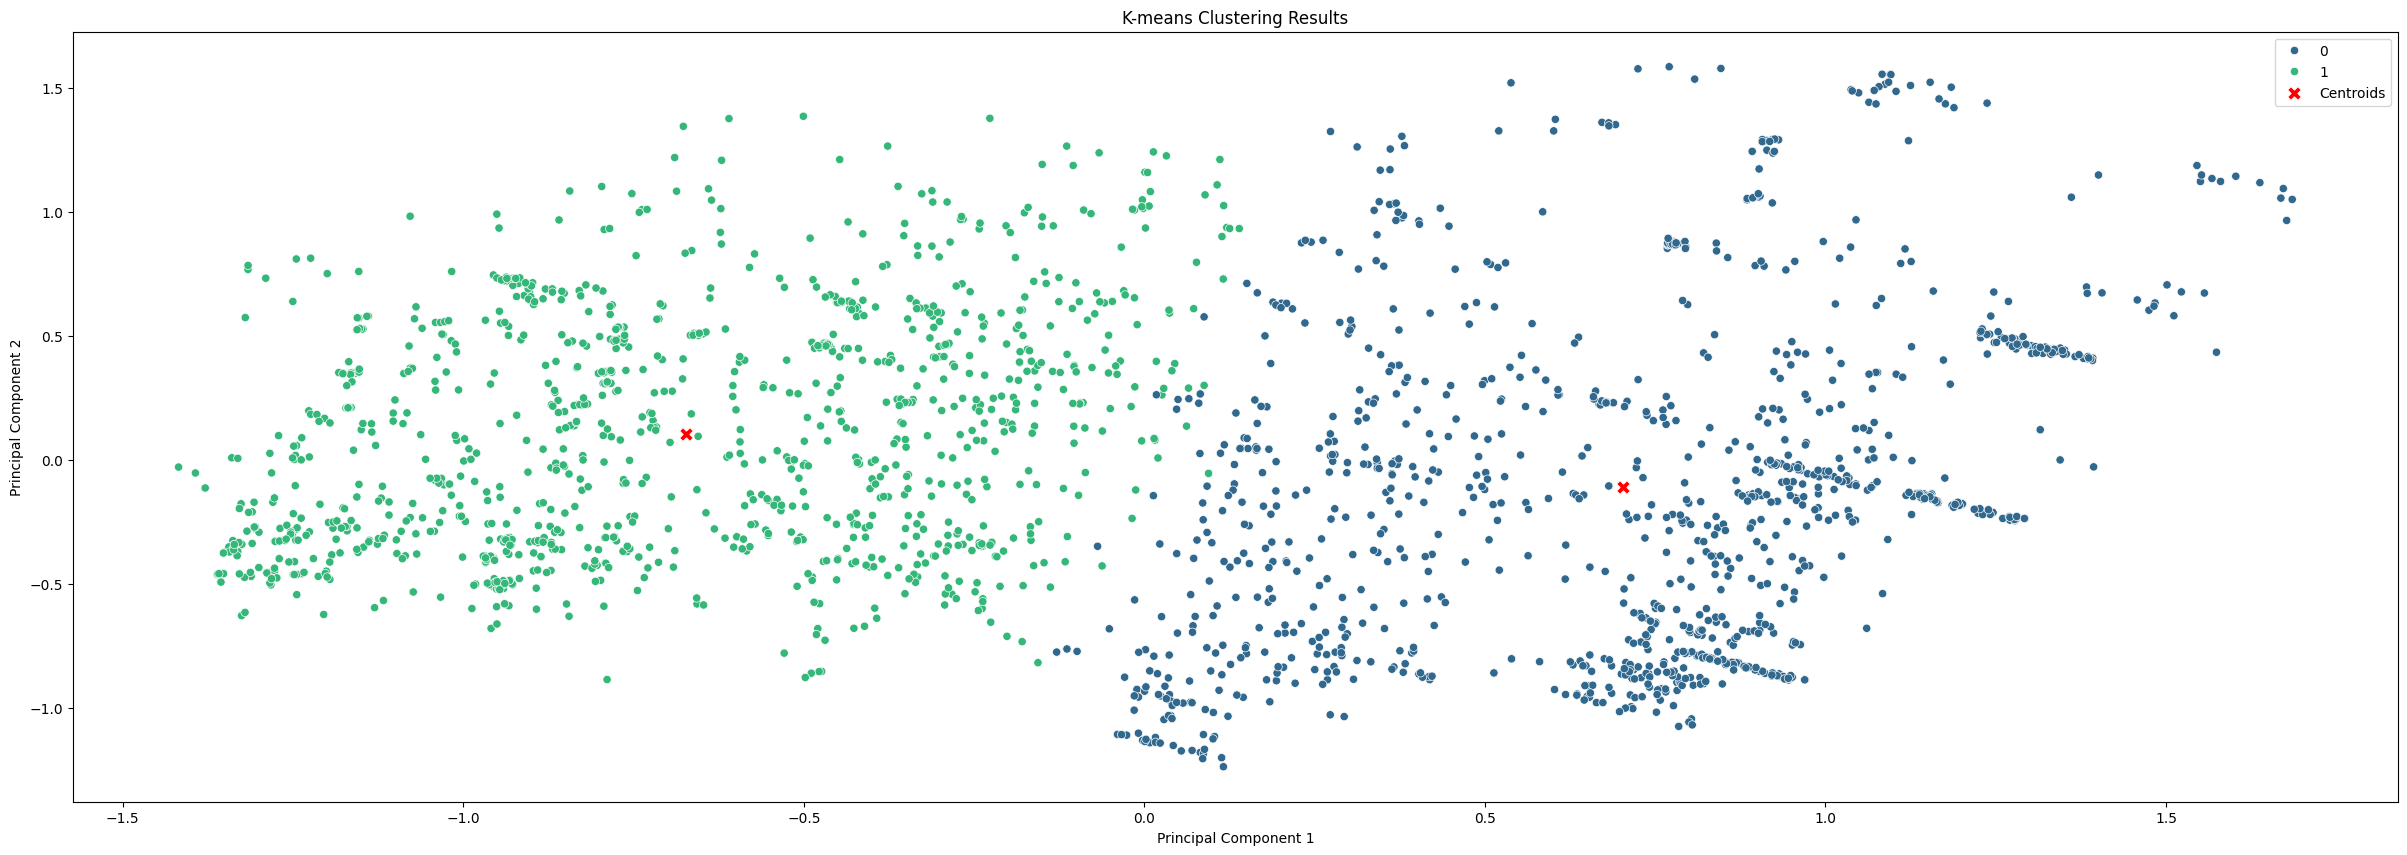

In [109]:
# Обрання оптимальної кількості кластерів
optimal_clusters = 2  # Припустимо, що оптимальна кількість кластерів - 2

# Навчання моделі з оптимальною кількістю кластерів
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(X_train)
labels = kmeans.labels_

# Візуалізація результатів кластеризації
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
centroids = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(30, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', legend='full')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='X', s=100, label='Centroids')
plt.title('K-means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [67]:
import plotly.express as px


# Візуалізація результатів кластеризації
pca1 = PCA(n_components=3)
X_pca_3d = pca1.fit_transform(X_train)
centroids1 = pca1.transform(kmeans.cluster_centers_)
fig = px.scatter_3d(df, x=X_pca_3d[:, 0], y=X_pca_3d[:, 1], z=X_pca_3d[:, 2], color=labels, symbol=labels, opacity=1)
fig.add_scatter3d(x=centroids1[:, 0], y=centroids1[:, 1], z=centroids1[:, 2], mode='markers', marker=dict(size=10, color='red', symbol='cross'), name='Centroids')
fig.show()

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



For n_clusters = 2 The average silhouette_score is : 0.128019963755068
For n_clusters = 3 The average silhouette_score is : 0.10630212629180179
For n_clusters = 4 The average silhouette_score is : 0.10914618279561047
For n_clusters = 5 The average silhouette_score is : 0.11343657366361475
For n_clusters = 6 The average silhouette_score is : 0.09524967449692816
For n_clusters = 7 The average silhouette_score is : 0.11040280873808218
For n_clusters = 8 The average silhouette_score is : 0.1041142325557368
For n_clusters = 9 The average silhouette_score is : 0.08734035260914705
For n_clusters = 10 The average silhouette_score is : 0.09102218703481214


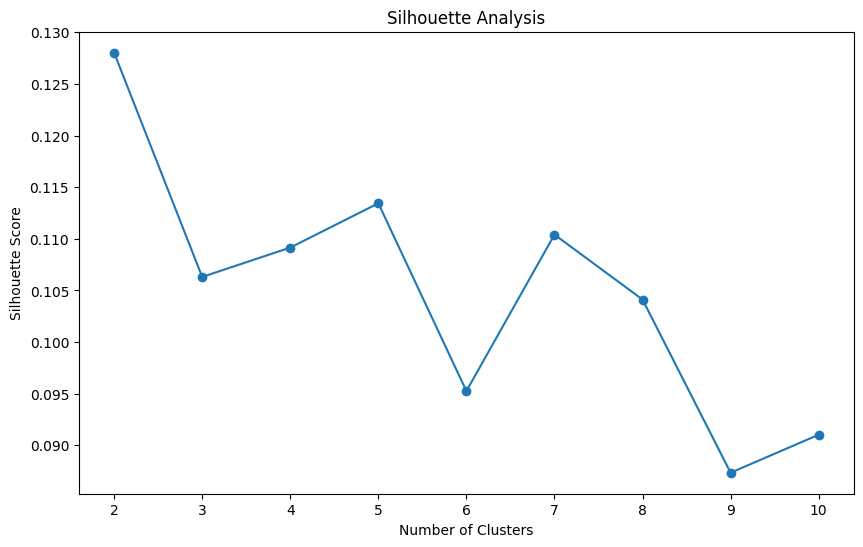

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Кількість кластерів, яку ви хочете спробувати
n_clusters_range = range(2, 11)

# Обчислення коефіцієнта силуета для кожного n_clusters
silhouette_scores = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

# Побудова діаграми силуета
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(n_clusters_range)
plt.show()

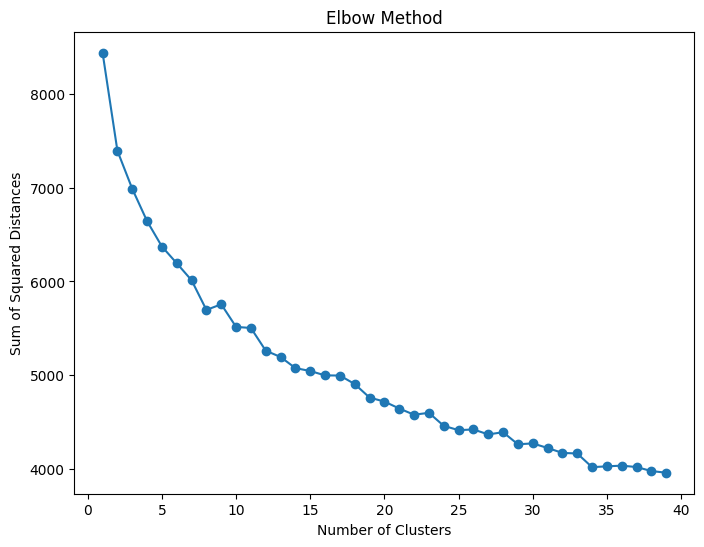

In [15]:
sse = []
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 40), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

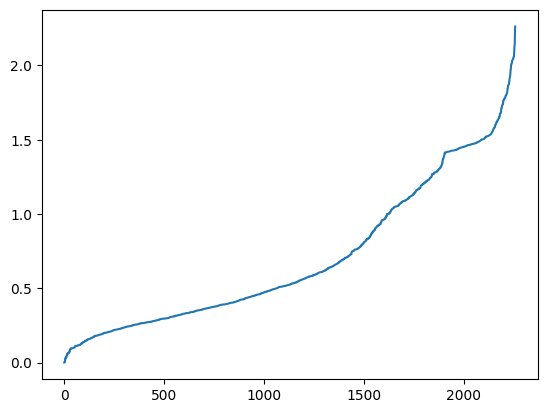

In [18]:
from sklearn.neighbors import NearestNeighbors
# Визначення eps за допомогою методу k-distance graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_train)
distances, _ = neighbors_fit.kneighbors(X_train)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

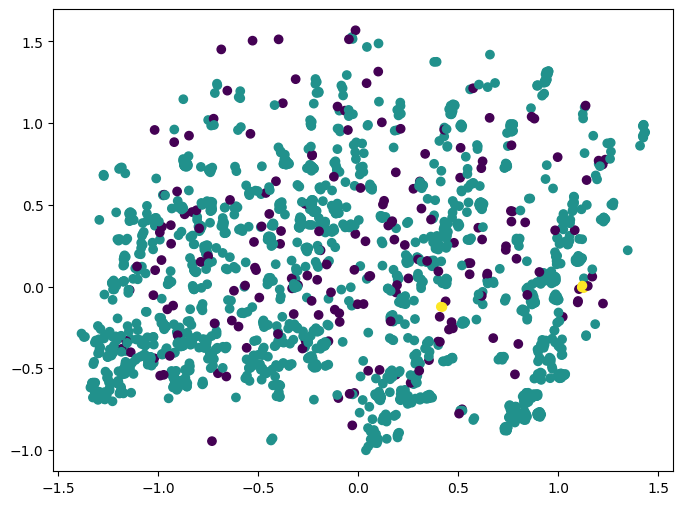

Estimated number of clusters: 2
Estimated percentage of noise points: 8.19%


In [19]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
# Обчислення eps
neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(X_train)
distances, _ = neigh.kneighbors(X_train)
eps = 1.6

# Обчислення min_samples
min_samples = 10

# Навчання моделі DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y_dbscan = dbscan.fit_predict(X_train)

# Відображення результатів
plt.figure(figsize=(8, 6))
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=y_dbscan, cmap='viridis')

plt.show()

# Підрахунок кількості кластерів та відсотку об'єктів, які не були кластеризовано
n_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise_ = list(y_dbscan).count(-1)
percentage_noise = (n_noise_ / len(y_dbscan)) * 100
print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated percentage of noise points: {percentage_noise:.2f}%')

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

# Знаходження k-ого найближчого сусіда для кожного зразка
k = 20
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_train)
distances, _ = neigh.kneighbors(X_train)

# Обчислення середнього значення k-ого найближчого сусіда
avg_distance = distances.mean(axis=0)
eps = eps = np.mean(distances[:, -1])
# Визначення min_samples за емпіричним правилом

# Навчання моделі DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=k)
y_dbscan = dbscan.fit_predict(X_train)

# Підрахунок кількості кластерів та відсотку об'єктів, що не були кластеризовані
n_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise_ = list(y_dbscan).count(-1) / len(y_dbscan) * 100

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated percentage of noise points: {n_noise_:.2f}%')
print(eps)
# Візуалізація результатів
plt.figure(figsize=(8, 6))
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=y_dbscan, cmap='viridis')
plt.show()

Estimated number of clusters: 2
Estimated percentage of noise points: 23.95%
1.5121673963110278


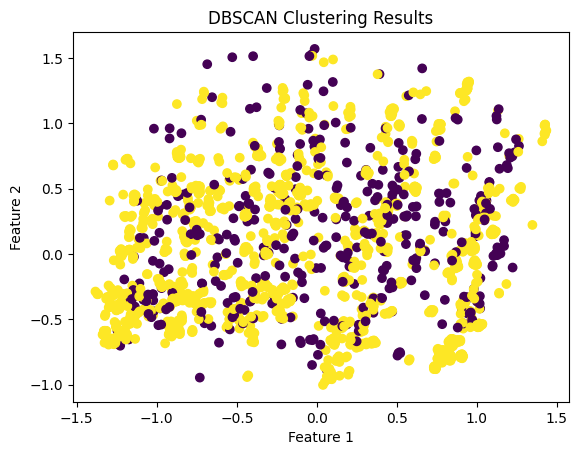

Estimated number of clusters: 1
Estimated percentage of noise points: 16.91%
1.5121673963110278


In [21]:
# Проведіть grid-пошук для min_samples
min_samples_values = [3, 5, 7, 10] # Задайте потрібні значення для grid-пошуку
best_score = -1
best_min_samples = None
for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_dbscan = dbscan.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, y_dbscan)
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_min_samples = min_samples

# Навчання моделі DBSCAN з оптимальними значеннями eps та min_samples
dbscan = DBSCAN(eps=eps, min_samples=best_min_samples)
y_dbscan = dbscan.fit_predict(X_train)

# Візуалізація результатів
plt.scatter(x=X_pca[:, 0], y=X_pca[:, 1], c=y_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Підрахунок кількості кластерів та відсотку об'єктів, що не були кластеризовані
n_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise_ = list(y_dbscan).count(-1) / len(y_dbscan) * 100

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated percentage of noise points: {n_noise_:.2f}%')
print(eps)

In [122]:
# Оптимальні параметри для кожної моделі
optimal_kmeans = {'silhouette_score': silhouette_score(X_train, labels), 'calinski_harabasz_score': calinski_harabasz_score(X_train, labels)}
optimal_dbscan = {'silhouette_score': silhouette_score(X_train, y_dbscan), 'calinski_harabasz_score': calinski_harabasz_score(X_train, y_dbscan)}

# Створення DataFrame з метриками
data = {'KMeans': optimal_kmeans, 'DBSCAN': optimal_dbscan}
dfres = pd.DataFrame(data)

# Виведення таблиці
print(dfres)

                            KMeans     DBSCAN
silhouette_score         -0.142554   0.075516
calinski_harabasz_score  24.787796  30.955381
